# 🥱 LangGraph_SuperVisor_啦啦隊轉隊篇

❤️ Created by [hengshiousheu](https://huggingface.co/Heng666).

# 環境建置

## 安裝套件包

在本演練中，

我們將使用以下套件：

In [ ]:
%pip install --upgrade --quiet langchain
%pip install --upgrade --quiet langchain-openai
%pip install --upgrade --quiet langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 598.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 791.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

我們需要設置 環境變數 OPENAI_API_KEY ，可以直接完成，如下所示：

In [ ]:
import os
import getpass
from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### (可用可不用)LangSmith

你用LangChain構建的許多應用程式將包含多個步驟，並多次調用LLM調用。隨著這些應用程式變得越來越複雜，能夠檢查您的鏈或代理內部到底發生了什麼變得至關重要。最好的方法是與[LangSmith](https://smith.langchain.com)合作。

請注意，LangSmith 不是必需的，但它很有説明。如果您確實想使用 LangSmith，請在上面的鏈接中註冊后，請確保設置環境變數以開始記錄跟蹤：

In [ ]:
import os
import getpass
from datetime import datetime
import pytz

current_time = datetime.now(pytz.timezone('Asia/Taipei')).strftime("%Y-%m-%d %Z")

os.environ["LANGCHAIN_TRACING_V2"] = "false" ##想要使用記得改 true, 不要時改 false.
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = f"LangGraph Supervisor-{current_time}"
os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')

# 台灣棒球和啦啦隊新聞自動化處理系統

這段程式碼實現了一個自動化的新聞處理系統，專門用於處理台灣職業棒球聯盟（CPBL）相關的新聞文章，特別關注球員轉隊和啦啦隊成員異動的新聞。整個工作流程包括以下幾個主要步驟：

1. 評估文章相關性：
   - 判斷文章是否與 CPBL 球員轉隊或啦啦隊成員異動相關
   - 如果不相關，工作流程立即結束

2. 檢查文章發布標準：
   - 確認文章字數是否達到最低要求（至少 300 字）
   - 驗證文章是否使用繁體中文撰寫
   - 評估文章風格是否適合台灣讀者，包括使用本地化的表達方式和術語

3. 必要時進行翻譯：
   - 如果原文是英文（例如國際新聞源的報導），將其翻譯成繁體中文
   - 翻譯時注意保留台灣特有的棒球術語和表達方式

4. 必要時擴展文章內容：
   - 如果文章未達到最低字數要求，進行內容擴展
   - 擴展時加入相關背景資訊，如球員/啦啦隊成員的過往表現、球隊歷史等
   - 可能加入專家評論或假想的球迷反應，以增加文章深度

5. 再次評估和最終發布決定：
   - 經過翻譯或擴展後的文章重新進行發布標準檢查
   - 確認文章是否符合所有發布要求
   - 做出最終的發布決定

這個工作流程旨在自動化處理 CPBL 相關新聞，確保發布的內容既準確又吸引人，同時符合台灣讀者的閱讀習慣和興趣。它能夠處理各種情況，包括簡短的新聞快訊、需要翻譯的國際報導，以及需要更多背景信息的初步報導。

![Lagngraph_supervisor.png](https://i.imgur.com/PC885wj.png)

## 建置 TransfreNewsGrader，啦啦隊相關新聞評估

識別出各種與台灣職棒啦啦隊相關的新聞，這在台灣的棒球文化中是一個獨特而重要的方面。它可以用於：

- 協助球迷追蹤他們喜愛的啦啦隊成員的動向。
- 幫助媒體快速篩選與分類啦啦隊相關的新聞。
- 為球隊管理層提供關於競爭對手啦啦隊變動的信息。
- 追蹤啦啦隊在台灣棒球文化中的影響和發展趨勢。

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

# 定義輸出格式（介面）
class CheerleaderNewsGrader(BaseModel):
    """Binary score for relevance check on Taiwanese professional baseball cheerleader news."""

    binary_score: str = Field(
        description="The article is about Taiwanese professional baseball cheerleaders, 'yes' or 'no'"
    )

# 定義 LLM 呼叫流程
llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)
structured_llm_grader = llm.with_structured_output(CheerleaderNewsGrader)

system = """You are a grader assessing whether a news article concerns Taiwanese professional baseball cheerleaders.
    Check if the article explicitly mentions:
    1. Cheerleader transfers between CPBL (Chinese Professional Baseball League) teams
    2. New cheerleader recruitment or retirement
    3. Special performances or events featuring the cheerleaders
    4. Controversies or notable incidents involving cheerleaders
    5. Changes in cheerleading teams' leadership or management
    Provide a binary score 'yes' or 'no' to indicate whether the news is about Taiwanese professional baseball cheerleaders."""

grade_prompt = ChatPromptTemplate.from_messages(
    [("system", system), ("human", "News Article:\n\n {article}")]
)
evaluator = grade_prompt | structured_llm_grader

# 測試 Agent 運作狀況
result = evaluator.invoke(
    {"震撼彈！知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊"}
)

print(result)

binary_score='yes'


## 建置 ArticlePostabilityGrader，文章可發佈性評估

評估台灣新聞文章的以下幾個方面：

- 文章是否達到發布標準（包括語法、完整性和適當性）
- 是否達到 300 字元的最低字數要求
- 是否使用了誇張的聳動寫作風格
- 是否使用繁體中文撰寫

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

class TaiwanArticlePostabilityGrader(BaseModel):
    """Binary scores for postability check, word count, sensationalism, and language verification of a Taiwanese news article."""

    can_be_posted: str = Field(
        description="The article is ready to be posted, 'yes' or 'no'"
    )
    meets_word_count: str = Field(
        description="The article has at least 300 characters, 'yes' or 'no'"
    )
    is_sensationalistic: str = Field(
        description="The article is written in a sensationalistic style, 'yes' or 'no'"
    )
    is_language_traditional_chinese: str = Field(
        description="The language of the article is Traditional Chinese, 'yes' or 'no'"
    )

llm_postability = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)
structured_llm_postability_grader = llm_postability.with_structured_output(
    TaiwanArticlePostabilityGrader
)

postability_system = """You are a grader assessing whether a Taiwanese news article is ready to be posted, if it meets the minimum character count of 300 characters, is written in a sensationalistic style, and if it is in Traditional Chinese. \n
    Evaluate the article for grammatical errors, completeness, appropriateness for publication, and EXAGGERATED sensationalism. \n
    Also, confirm if the language used in the article is Traditional Chinese and it meets the character count requirement. \n
    Provide four binary scores: one to indicate if the article can be posted ('yes' or 'no'), one for adequate character count ('yes' or 'no'), one for sensationalistic writing ('yes' or 'no'), and another if the language is Traditional Chinese ('yes' or 'no').\n
    Pay attention to Taiwan-specific terms, idioms, and writing styles."""

postability_grade_prompt = ChatPromptTemplate.from_messages(
    [("system", postability_system), ("human", "News Article:\n\n {article}")]
)

news_chef = postability_grade_prompt | structured_llm_postability_grader

# 測試 Agent 運作狀況
result = news_chef.invoke(
    {
        "article": "震撼彈！知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。消息一出，引起球迷熱烈討論。有內部消息指出，小雨此舉可能與新東家開出的天價薪酬有關。究竟是否屬實？本報將持續追蹤報導。敬請球迷朋友們拭目以待，這個夏天的職棒轉會市場肯定會掀起更多驚人巨浪！"
    }
)
print(result)

can_be_posted='yes' meets_word_count='yes' is_sensationalistic='yes' is_language_traditional_chinese='yes'


## 建置 translation_system，文章翻譯

將台灣新聞文章翻譯成英文。以適應台灣新聞的上下文。

- 它強調保持原有的基調和風格。
- 它要求特別關注台灣文化參考和習語。
- 它指導譯者正確處理運動隊伍名稱、運動員姓名和其他專有名詞。
- 它強調保持引用言論的語氣和意圖。

此翻譯器可用於：

- 國際新聞社通報台灣事件。
- 台灣的英文新聞媒體。
- 需要了解台灣新聞但繁體中文不流利的研究人員或分析師。
- 對台灣職棒新聞有興趣的運動組織或球迷。

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# Define LLM call process
llm_translation = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)

translation_system = """You are a translator converting Taiwanese news articles into English.
Translate the text accurately while maintaining the original tone and style.
Pay special attention to Taiwanese cultural references, idioms, and context.
Ensure that sports team names, player names, and other proper nouns are correctly transliterated or translated as appropriate.
When translating quotes, maintain the speaker's tone and intent."""

translation_prompt = ChatPromptTemplate.from_messages(
    [("system", translation_system), ("human", "Article to translate:\n\n {article}")]
)

translator = translation_prompt | llm_translation

# Test the Agent
result = translator.invoke(
    {
        "article": "震撼彈！知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。消息一出，引起球迷熱烈討論。有內部消息指出，小雨此舉可能與新東家開出的天價薪酬有關。究竟是否屬實？本報將持續追蹤報導。敬請球迷朋友們拭目以待，這個夏天的職棒轉會市場肯定會掀起更多驚人巨浪！"
    }
)

print(result)

content="Bombshell news! The renowned cheerleading goddess Little Rain has announced her departure from the Lamigo Monkeys and will join the Uni-President Lions' cheerleading team. The news has sparked intense discussions among fans. Internal sources suggest that Little Rain's move may be related to the lucrative salary offered by her new team. Is it true? This paper will continue to follow up on the report. Fans, please stay tuned, as this summer's professional baseball transfer market is sure to bring about more astonishing waves!" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 280, 'total_tokens': 381}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-738ec396-8801-447e-81a2-8f13d39a89e0-0' usage_metadata={'input_tokens': 280, 'output_tokens': 101, 'total_tokens': 381}


## 建置 expansion_system，文章擴展

系統提示，使其更符合台灣新聞的寫作風格和需求：

- 強調使用台灣讀者熟悉的表達方式和用語。
- 建議加入專家或相關人士的假想評論，這是台灣新聞常見的做法。
- 要求考慮新聞事件對台灣社會的影響。
- 鼓勵在適當的地方加入台灣特有的文化元素。

該系統可以用於：

- 快速生成更詳細的新聞稿。
- 將簡短的新聞線索擴展成完整的報導。
- 為編輯提供更多素材，以便他們進一步編輯和完善。
- 在保持原始新聞核心的同時，提供更多上下文和背景信息。

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

# 定義 LLM 呼叫流程
llm_expansion = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0.5)

expansion_system = """你是一位專業的台灣新聞記者，負責將給定的簡短新聞擴展至至少 300 字。在擴展過程中，請注意以下幾點：

1. 保持原文的主題和tone，同時增加相關的背景資訊和細節。
2. 使用台灣讀者熟悉的表達方式和用語。
3. 適當加入一些專家或相關人士的假想評論，以增加新聞的深度。
4. 考慮新聞事件可能對台灣社會或特定群體的影響。
5. 在適當的地方加入一些台灣特有的文化元素或本地化的例子。
6. 確保擴展後的文章仍然保持客觀性和新聞專業性。
7. 使用繁體中文撰寫。"""

expansion_prompt = ChatPromptTemplate.from_messages(
    [("system", expansion_system), ("human", "原始新聞內容：\n\n {article}")]
)

expander = expansion_prompt | llm_expansion

# 測試 Agent 運作狀況
article_content = "知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。"
result = expander.invoke({"article": article_content})

print(result)

content='知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。這項轉隊消息震驚了許多棒球迷和啦啦隊支持者。小雨在Lamigo桃猿效力多年，以其優美的舞姿和活潑的氣質贏得了廣大球迷的喜愛，因此她的轉隊決定引起了不少關注和討論。\n\n有關小雨轉隊的消息一出，立刻在網路上引發熱烈的討論。許多網友紛紛表達對小雨的支持和祝福，同時也有不少粉絲表示對她離開桃猿隊感到遺憾。一位網友表示：「小雨是我們桃猿隊的靈魂啦啦隊女神，她的離開讓我們感到非常失落，但也希望她在新的環境能有更好的發展。」\n\n對於小雨轉戰統一獅啦啦隊的原因，有些消息指出是出於個人發展考量，也有傳聞指出是因為合約問題。然而，小雨本人對於轉隊的原因並未透露太多細節，僅表示對於未來的新挑戰感到興奮。\n\n對於這項轉隊消息，一些啦啦隊相關的專家表示，小雨的加入將為統一獅啦啦隊帶來全新的活力和風格，也有助於提升球場氣氛，讓觀眾更加投入比賽。啦啦隊在棒球比賽中扮演著重要的角色，能夠為球隊加油打氣，同時也為觀眾帶來更豐富多元的娛樂。\n\n值得一提的是，啦啦隊在台灣棒球賽事中扮演著相當重要的角色，他們不僅能夠增添現場氣氛，更是球迷心目中的焦點。因此，小雨的轉隊不僅是她個人的選擇，也影響著球迷和球隊的互動。希望小雨在新的球隊能夠繼續展現她的舞藝，為台灣棒球帶來更多色彩。' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 809, 'prompt_tokens': 351, 'total_tokens': 1160}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None} id='run-0f1a6311-a6ff-4297-b551-a1243a33cf1d-0' usage_metadata={'input_tokens': 351, 'output_tokens': 809, 'total_tokens': 1160}


### 定義 State

- 定義了一個名為 AgentState 的 TypedDict。
- 它只包含一個鍵 article_state，用於存儲當前處理的文章內容。
- 使用 TypedDict 有助於提高代碼的類型安全性和可讀性。

In [ ]:
from typing import TypedDict

class AgentState(TypedDict):
    article_state: str

## 定義節點函數以及 Agent

In [ ]:
### 呼叫 Agnet 工作以及顯示節點狀態用
def get_transfer_news_grade(state: AgentState) -> AgentState:
    print(f"get_transfer_news_grade: Current state: {state}")
    print("Evaluator: Reading article but doing nothing to change it...")
    return state
def evaluate_article(state: AgentState) -> AgentState:
    print(f"evaluate_article: Current state: {state}")
    print("News : Reading article but doing nothing to change it...")
    return state
def translate_article(state: AgentState) -> AgentState:
    print(f"translate_article: Current state: {state}")
    article = state["article_state"]
    result = translator.invoke({"article": article})
    state["article_state"] = result.content
    return state
def expand_article(state: AgentState) -> AgentState:
    print(f"expand_article: Current state: {state}")
    article = state["article_state"]
    result = expander.invoke({"article": article})
    state["article_state"] = result.content
    return state
def publisher(state: AgentState) -> AgentState:
    print(f"publisher: Current state: {state}")
    print("FINAL_STATE in publisher:", state)
    return state

定義路由函數

In [ ]:
from typing import TypedDict, Literal

## 提供路由使用
def evaluator_router(state: AgentState) -> Literal["news_chef", "not_relevant"]:
    article = state["article_state"]
    evaluator = grade_prompt | structured_llm_grader
    result = evaluator.invoke({"article": article})
    print(f"evaluator_router: Current state: {state}")
    print("Evaluator result: ", result)
    if result.binary_score == "yes":
        return "news_chef"
    else:
        return "not_relevant"
def news_chef_router(
    state: AgentState,
) -> Literal["translator", "publisher", "expander"]:
    article = state["article_state"]
    result = news_chef.invoke({"article": article})
    print(f"news_chef_router: Current state: {state}")
    print("News chef result: ", result)
    if result.can_be_posted == "yes":
        return "publisher"
    elif result.is_language_traditional_chinese == "yes":
        if result.meets_word_count == "no" or result.is_sensationalistic == "no":
            return "expander"
    return "translator"

建立與配置 Graph

In [ ]:
from langgraph.graph import StateGraph, END

workflow = StateGraph(AgentState)

workflow.add_node("evaluator", get_transfer_news_grade)
workflow.add_node("news_chef", evaluate_article)
workflow.add_node("translator", translate_article)
workflow.add_node("expander", expand_article)
workflow.add_node("publisher", publisher)

workflow.set_entry_point("evaluator")

workflow.add_conditional_edges(
    "evaluator", evaluator_router, {"news_chef": "news_chef", "not_relevant": END}
)
workflow.add_conditional_edges(
    "news_chef",
    news_chef_router,
    {"translator": "translator", "publisher": "publisher", "expander": "expander"},
)
workflow.add_edge("translator", "news_chef")
workflow.add_edge("expander", "news_chef")
workflow.add_edge("publisher", END)

app = workflow.compile()

可視化當前節點

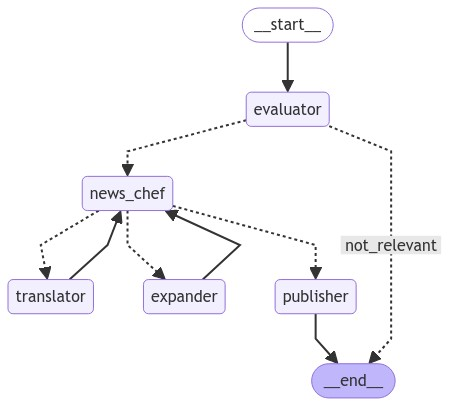

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass

### 案例一、啦啦隊新聞

In [ ]:
test_case_1 = {
    "article_state": "知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。"
}
result_1 = app.invoke(test_case_1)
print(result_1)

get_transfer_news_grade: Current state: {'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}
Evaluator: Reading article but doing nothing to change it...
evaluator_router: Current state: {'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}
Evaluator result:  binary_score='yes'
evaluate_article: Current state: {'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}
News : Reading article but doing nothing to change it...
news_chef_router: Current state: {'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}
News chef result:  can_be_posted='yes' meets_word_count='no' is_sensationalistic='yes' is_language_traditional_chinese='yes'
publisher: Current state: {'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}
FINAL_STATE in publisher: {'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}
{'article_state': '知名啦啦隊女神小雨宣布退出Lamigo桃猿，轉戰統一獅啦啦隊。'}


這個案例測試基本的新聞處理流程：

- evaluator 應該判定這是相關的啦啦隊新聞。
- news_chef 可能會發現文章太短，需要擴展。
- expander 會擴展文章。
- 擴展後的文章會再次通過 news_chef 評估。
- 如果符合發布標準，文章會被發送到 publisher。

### 案例二、不相關新聞

In [ ]:
test_case_2 = {
    "article_state": "台北市今日發布最新空氣品質報告，PM2.5指數持續攀升。"
}
result_2 = app.invoke(test_case_2)
print(result_2)

get_transfer_news_grade: Current state: {'article_state': '台北市今日發布最新空氣品質報告，PM2.5指數持續攀升。'}
Evaluator: Reading article but doing nothing to change it...
evaluator_router: Current state: {'article_state': '台北市今日發布最新空氣品質報告，PM2.5指數持續攀升。'}
Evaluator result:  binary_score='no'
{'article_state': '台北市今日發布最新空氣品質報告，PM2.5指數持續攀升。'}


這個案例測試工作流程如何處理不相關的新聞：

- evaluator 應該判定這不是啦啦隊或棒球相關新聞。
- 工作流程應該直接結束，不進行後續處理。

### 案例三：英文新聞的翻譯和處理

In [ ]:
test_case_3 = {
    "article_state": "CPBL star outfielder Wang Po-Jung considering a return to NPB after successful stint with Lamigo Monkeys."
}
result_3 = app.invoke(test_case_3)
print(result_3)

get_transfer_news_grade: Current state: {'article_state': 'CPBL star outfielder Wang Po-Jung considering a return to NPB after successful stint with Lamigo Monkeys.'}
Evaluator: Reading article but doing nothing to change it...
evaluator_router: Current state: {'article_state': 'CPBL star outfielder Wang Po-Jung considering a return to NPB after successful stint with Lamigo Monkeys.'}
Evaluator result:  binary_score='no'
{'article_state': 'CPBL star outfielder Wang Po-Jung considering a return to NPB after successful stint with Lamigo Monkeys.'}


這個案例測試工作流程如何處理英文新聞：

- evaluator 應該判定這是相關的棒球新聞。
- news_chef 會發現文章是英文，需要翻譯。
- translator 會將文章翻譯成繁體中文。
- 翻譯後的文章會再次通過 news_chef 評估。
- 如果文章仍然較短，可能會被送到 expander 進行擴展。
最終，如果符合發布標準，文章會被送到 publisher。